In [1]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4, n_features=5):
    """
    Cria um dataset bidimensional binário com
    inclinação e interceptação do eixo vertical
    parametrizados.
    """
    X = np.random.uniform(size=(n,n_features))
    AUX = np.multiply(X[:,:2], slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
n_features = 5
Xtr, ytr = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept, n_features=n_features)
Xtr, ytr

(array([[0.17558124, 0.04805107, 0.15356304, 0.6140445 , 0.01808866],
        [0.57155875, 0.48416886, 0.63655053, 0.96320928, 0.33503323],
        [0.80011276, 0.18135995, 0.5340144 , 0.86230999, 0.24619456],
        [0.19189087, 0.31420376, 0.81336637, 0.6245526 , 0.11426651],
        [0.52217729, 0.16581163, 0.17417422, 0.34328613, 0.38212186],
        [0.69776703, 0.6201515 , 0.25496879, 0.54368034, 0.9578167 ],
        [0.80636573, 0.52327567, 0.19474119, 0.31825041, 0.84641871],
        [0.32408584, 0.92370683, 0.64379215, 0.37974938, 0.74358577],
        [0.92943405, 0.7822573 , 0.2535168 , 0.29844479, 0.58112501],
        [0.96661663, 0.80885921, 0.4460211 , 0.95410436, 0.22246385],
        [0.43311884, 0.66179995, 0.71192476, 0.90092335, 0.8946421 ],
        [0.91185539, 0.88243609, 0.57065002, 0.16440403, 0.98783073],
        [0.94858558, 0.52683752, 0.91988972, 0.17901475, 0.75943384],
        [0.82414788, 0.36529369, 0.49437992, 0.43330809, 0.99877725],
        [0.47725064,

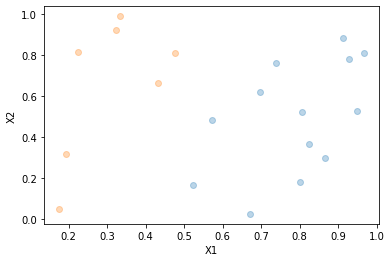

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

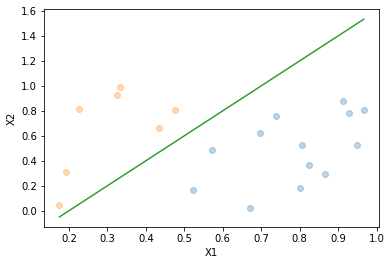

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

In [6]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
    @abstractmethod
    def getW(self, X, y, activation):
        pass


class PseudoInversa(TrainingAlgorithm):
    def __init__(self, regularization=0):
        self.regularization = regularization
    def getW(self, X, y):
        if self.regularization == 0:
            return np.linalg.pinv(X) @ y
        return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y


class DescidaGradiente(TrainingAlgorithm):
    def __init__(self, max_iter=250, learning_rate=0.02, regularization=0):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.regularization = regularization

    def getW(self, X, y):
        w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = X @ w
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            w *= 1 - self.regularization * self.learning_rate
            w += (X.T @ erros) * self.learning_rate
        return w

1.0
[-0.92271034  3.06332932 -0.80830774 -0.7737054   0.14318323  0.17182388]
11.537387179153153


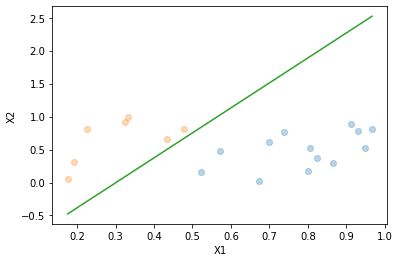

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão Adaline do Perceptron com limite de iterações,
    treinado em batch, com bias e taxa de aprendizado.
    """
    def __init__(self, training_algrithm=DescidaGradiente()):
        self.w = None
        self.activation = sign
        self.training_algorithm = training_algrithm
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = self.training_algorithm.getW(Xb, y)
    
    def __pre_activation(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [8]:
Xte, yte = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept, n_features=n_features)

0.904


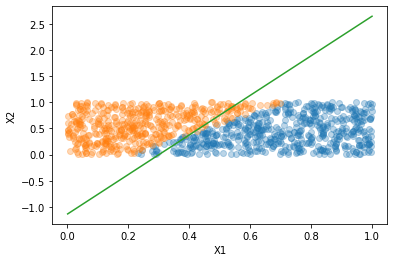

In [9]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])


1.0
[-0.23483761  1.68314689 -0.60957121 -0.50007764 -0.10138805  0.28889491]


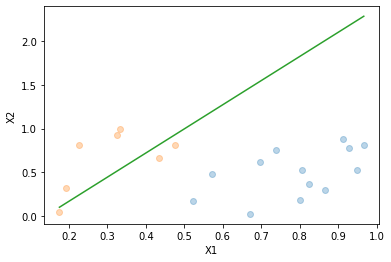

0.906
3.6035266783464954


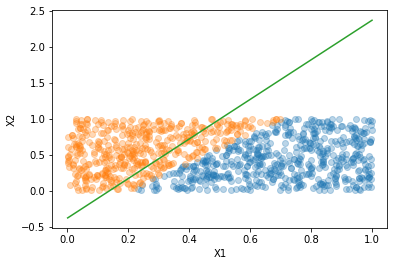

In [10]:
perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [11]:
perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


1.0 0.907 [-0.90414686  3.05374898 -0.82014715 -0.75928024  0.12202315  0.16985496]
1.0 0.923 [-0.42317103  2.15132781 -0.72215647 -0.60588198 -0.05816633  0.27028268]
1.0 0.906 [-0.23483103  1.68314454 -0.60955871 -0.50010335 -0.10138149  0.28889161]


In [12]:
perceptron = Perceptron(training_algrithm=PseudoInversa(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=PseudoInversa(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=PseudoInversa(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


1.0 0.901 [-1.00235722  3.12449817 -0.78771033 -0.74323587  0.17766811  0.15743195]
1.0 0.922 [-0.42432654  2.15160135 -0.72180529 -0.60657638 -0.05674707  0.27084289]
1.0 0.906 [-0.23508092  1.68331586 -0.60950972 -0.50000989 -0.10125994  0.28887294]
